In [1]:
import uproot
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import yahist
import itertools


plt.rcParams.update({"figure.facecolor":  (1,1,1,0)})

from utils.analysis import PandasAnalysis

In [2]:
babies = sorted(glob.glob(f"../analysis/studies/vvhjetsel/output/Run2/*.root"))
babies

['../analysis/studies/vvhjetsel/output/Run2/VBSVVH.root']

In [3]:
vbsvvh = PandasAnalysis(
    sig_root_files=babies,
    ttree_name="tree",
    weight_columns=[
        "xsec_sf", "pu_sf", "prefire_sf", "trig_sf"
    ]
)

Loading sig babies:   0%|                                                                                                                                                                                        | 0/1 [00:00<?, ?it/s]/home/users/jguiang/apps/miniconda3/envs/analysis/lib/python3.9/site-packages/uproot/interpretation/library.py:805: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[name] = series[name]
/home/users/jguiang/apps/miniconda3/envs/analysis/lib/python3.9/site-packages/uproot/interpretation/library.py:805: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-frag

/home/users/jguiang/apps/miniconda3/envs/analysis/lib/python3.9/site-packages/uproot/interpretation/library.py:805: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[name] = series[name]
/home/users/jguiang/apps/miniconda3/envs/analysis/lib/python3.9/site-packages/uproot/interpretation/library.py:805: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[name] = series[name]
/home/users/jguiang/apps/miniconda3/envs/analysis/lib/python3.9/site-packages/uproot/interpretation/library.py:805: PerformanceWarning: DataFrame is highly frag

In [4]:
fatjet_cols = vbsvvh.df.columns.str.contains("fatjet")
genlvl_cols = vbsvvh.df.columns.str.contains("gen_")
other_cols = np.isin(vbsvvh.df.columns, ["event_weight", "n_fatjets"])
columns = vbsvvh.df.columns[fatjet_cols | genlvl_cols | other_cols]
columns

Index(['fatjet1_pt', 'fatjet1_eta', 'fatjet1_phi', 'fatjet1_wqq',
       'fatjet1_zqq', 'fatjet1_hbb', 'fatjet1_xqq', 'fatjet1_xwqq',
       'fatjet1_xcc', 'fatjet1_xbb', 'fatjet1_match_pdgID', 'fatjet2_pt',
       'fatjet2_eta', 'fatjet2_phi', 'fatjet2_wqq', 'fatjet2_zqq',
       'fatjet2_hbb', 'fatjet2_xqq', 'fatjet2_xwqq', 'fatjet2_xcc',
       'fatjet2_xbb', 'fatjet2_match_pdgID', 'fatjet3_pt', 'fatjet3_eta',
       'fatjet3_phi', 'fatjet3_wqq', 'fatjet3_zqq', 'fatjet3_hbb',
       'fatjet3_xqq', 'fatjet3_xwqq', 'fatjet3_xcc', 'fatjet3_xbb',
       'fatjet3_match_pdgID', 'fatjets_n_matches', 'gen_H_is_matched',
       'gen_H_is_bb', 'gen_H_pt', 'gen_H_eta', 'gen_H_phi',
       'gen_ld_V_is_matched', 'gen_ld_V_is_qq', 'gen_ld_V_pt', 'gen_ld_V_eta',
       'gen_ld_V_phi', 'gen_tr_V_is_matched', 'gen_tr_V_is_qq', 'gen_tr_V_pt',
       'gen_tr_V_eta', 'gen_tr_V_phi', 'gen_is_allhadronic', 'n_fatjets',
       'event_weight'],
      dtype='object')

In [5]:
vbsvvh.df = vbsvvh.df[columns]

In [6]:
vbsvvh.df.gen_H_is_bb.sum()

204649

In [7]:
vbsvvh.df.gen_ld_V_is_qq.sum()

326395

In [8]:
vbsvvh.df.gen_tr_V_is_qq.sum()

316594

In [9]:
vbsvvh.df.gen_is_allhadronic.sum()/len(vbsvvh.df)

0.5623329181489347

In [10]:
vbsvvh.df.columns

Index(['fatjet1_pt', 'fatjet1_eta', 'fatjet1_phi', 'fatjet1_wqq',
       'fatjet1_zqq', 'fatjet1_hbb', 'fatjet1_xqq', 'fatjet1_xwqq',
       'fatjet1_xcc', 'fatjet1_xbb', 'fatjet1_match_pdgID', 'fatjet2_pt',
       'fatjet2_eta', 'fatjet2_phi', 'fatjet2_wqq', 'fatjet2_zqq',
       'fatjet2_hbb', 'fatjet2_xqq', 'fatjet2_xwqq', 'fatjet2_xcc',
       'fatjet2_xbb', 'fatjet2_match_pdgID', 'fatjet3_pt', 'fatjet3_eta',
       'fatjet3_phi', 'fatjet3_wqq', 'fatjet3_zqq', 'fatjet3_hbb',
       'fatjet3_xqq', 'fatjet3_xwqq', 'fatjet3_xcc', 'fatjet3_xbb',
       'fatjet3_match_pdgID', 'fatjets_n_matches', 'gen_H_is_matched',
       'gen_H_is_bb', 'gen_H_pt', 'gen_H_eta', 'gen_H_phi',
       'gen_ld_V_is_matched', 'gen_ld_V_is_qq', 'gen_ld_V_pt', 'gen_ld_V_eta',
       'gen_ld_V_phi', 'gen_tr_V_is_matched', 'gen_tr_V_is_qq', 'gen_tr_V_pt',
       'gen_tr_V_eta', 'gen_tr_V_phi', 'gen_is_allhadronic', 'n_fatjets',
       'event_weight'],
      dtype='object')

In [11]:
vbsvvh.df

,fatjet1_pt,fatjet1_eta,fatjet1_phi,fatjet1_wqq,fatjet1_zqq,fatjet1_hbb,fatjet1_xqq,fatjet1_xwqq,fatjet1_xcc,fatjet1_xbb,...,gen_ld_V_eta,gen_ld_V_phi,gen_tr_V_is_matched,gen_tr_V_is_qq,gen_tr_V_pt,gen_tr_V_eta,gen_tr_V_phi,gen_is_allhadronic,n_fatjets,event_weight
0,659.0,0.227295,-0.058426,0.997070,0.994629,0.003656,0.926129,0.936554,0.689841,0.061065,...,0.172363,-2.835938,True,True,514.0,0.295898,-0.146973,False,2,0.000293
1,1191.0,0.205261,-2.744141,0.279053,0.914062,0.999512,0.193606,0.995891,0.995887,0.998349,...,0.259766,0.859375,True,True,480.0,0.804688,-0.343750,True,3,0.000290
2,657.0,-0.735596,0.642700,0.999023,0.993164,0.002792,0.982612,0.983496,0.754931,0.044077,...,-0.738281,0.642578,True,True,544.0,1.464844,-2.500000,False,2,0.000291
3,807.5,1.120850,-2.009766,0.989258,0.988281,0.001365,0.942191,0.949261,0.706775,0.007372,...,1.117188,-2.007812,True,True,462.0,-0.213867,1.328125,True,2,0.000293
4,775.5,0.551636,0.344421,0.997559,0.993164,0.000978,0.951194,0.955059,0.637973,0.005161,...,0.558594,0.340820,True,True,682.0,0.306641,2.742188,False,3,0.000293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334786,1160.0,1.031006,-0.376770,0.937500,0.996094,0.055389,0.931848,0.940405,0.678134,0.052984,...,1.035156,-0.380859,True,True,938.0,0.724609,3.062500,True,3,0.000639
334787,713.5,0.293335,0.682983,0.999023,0.998535,0.025650,0.987218,0.995137,0.992212,0.327696,...,0.290039,0.679688,False,True,386.0,-0.505859,-2.914062,True,2,0.000641
334788,689.0,1.102295,1.529053,0.699219,0.974121,0.000248,0.776313,0.780491,0.078421,0.000109,...,1.097656,1.531250,False,True,430.0,-0.558594,-1.121094,False,2,0.000641
334789,1117.0,0.507935,1.090820,0.090515,0.999512,0.998535,0.000737,0.035714,0.035028,0.999972,...,0.509766,1.089844,True,True,822.0,0.009888,-2.710938,True,3,0.000640


array([[<AxesSubplot:title={'center':'n_fatjets'}>]], dtype=object)

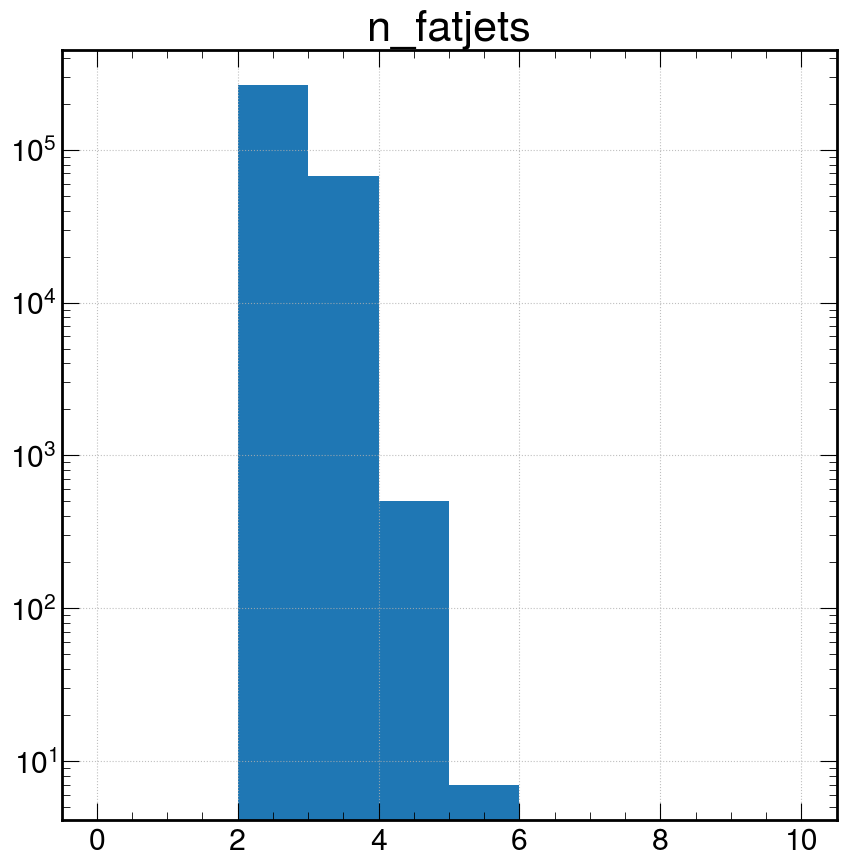

In [12]:
vbsvvh.df.hist("n_fatjets", bins=np.linspace(0, 10, 11), log=True)

array([[<AxesSubplot:title={'center':'n_fatjets'}>]], dtype=object)

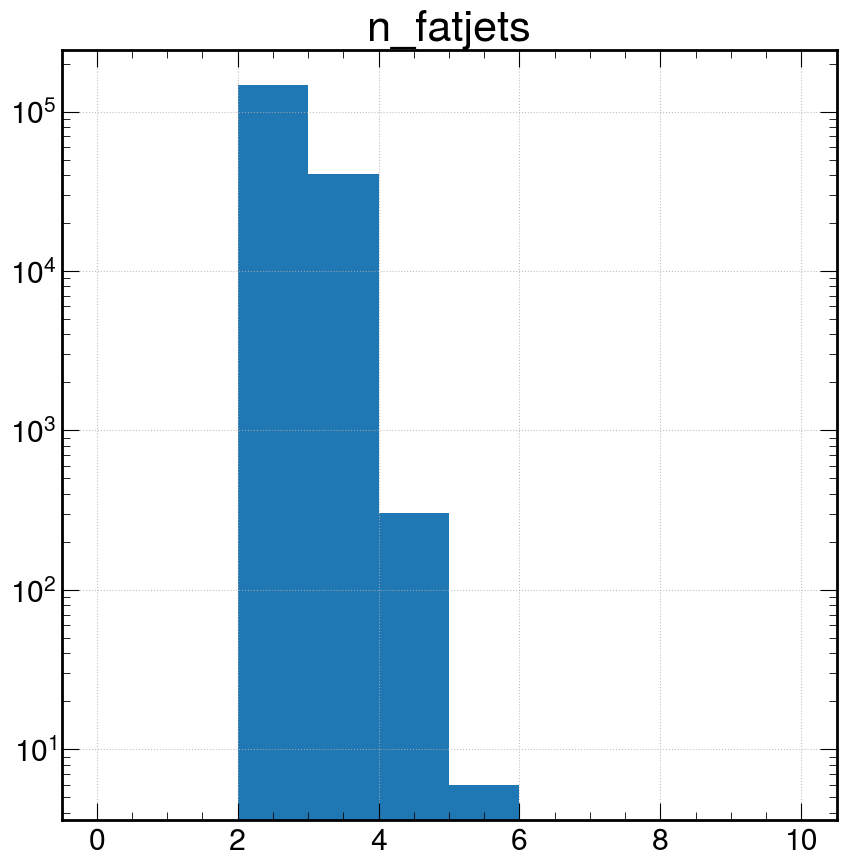

In [13]:
vbsvvh.df[vbsvvh.df.gen_is_allhadronic].hist("n_fatjets", bins=np.linspace(0, 10, 11), log=True)

array([[<AxesSubplot:title={'center':'fatjets_n_matches'}>]], dtype=object)

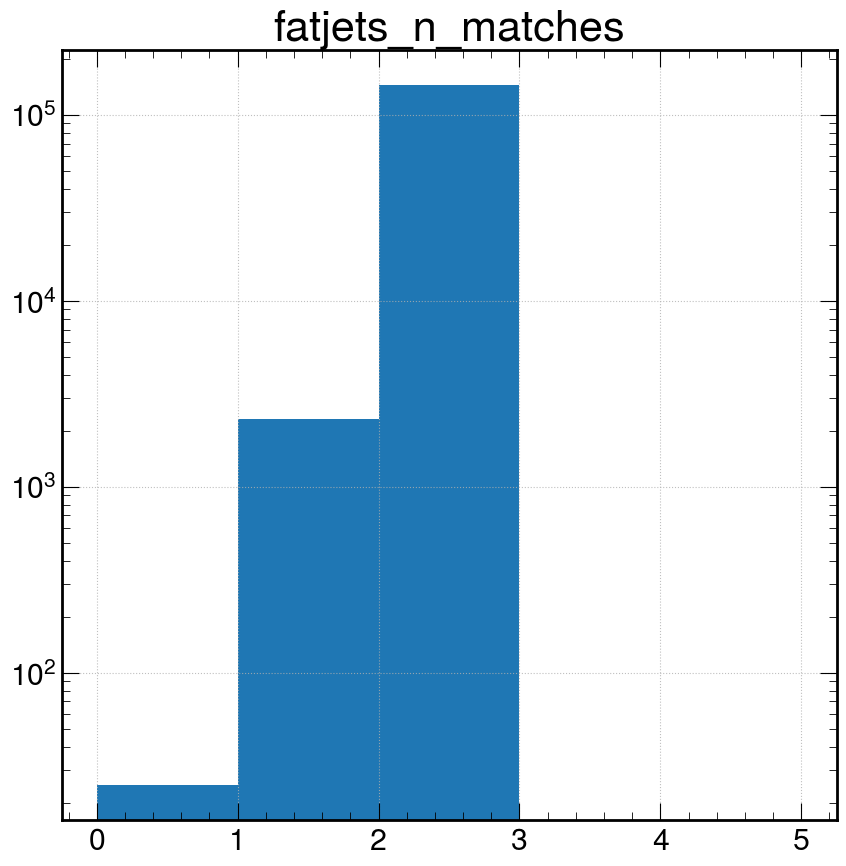

In [14]:
vbsvvh.df[vbsvvh.df.gen_is_allhadronic & (vbsvvh.df.n_fatjets == 2)].hist("fatjets_n_matches", bins=np.linspace(0, 5, 6), log=True)

array([[<AxesSubplot:title={'center':'fatjets_n_matches'}>]], dtype=object)

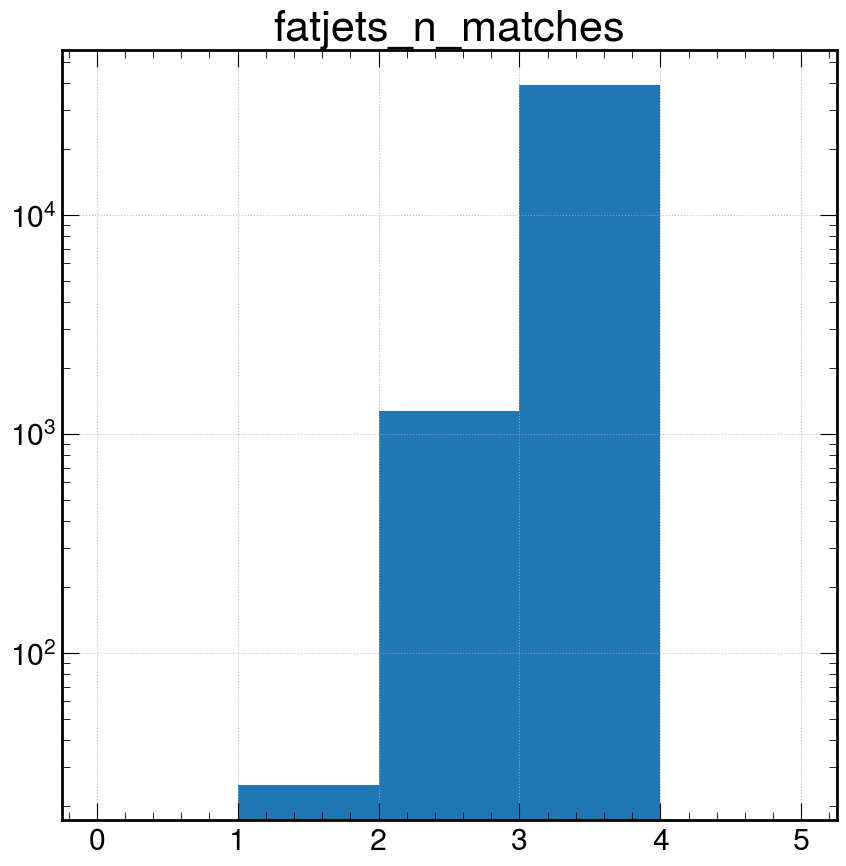

In [15]:
vbsvvh.df[vbsvvh.df.gen_is_allhadronic & (vbsvvh.df.n_fatjets == 3)].hist("fatjets_n_matches", bins=np.linspace(0, 5, 6), log=True)

In [16]:
vbsvvh.df[vbsvvh.df.gen_is_allhadronic & (vbsvvh.df.n_fatjets == 3)]

,fatjet1_pt,fatjet1_eta,fatjet1_phi,fatjet1_wqq,fatjet1_zqq,fatjet1_hbb,fatjet1_xqq,fatjet1_xwqq,fatjet1_xcc,fatjet1_xbb,...,gen_ld_V_eta,gen_ld_V_phi,gen_tr_V_is_matched,gen_tr_V_is_qq,gen_tr_V_pt,gen_tr_V_eta,gen_tr_V_phi,gen_is_allhadronic,n_fatjets,event_weight
1,1191.0,0.205261,-2.744141,0.279053,0.914062,0.999512,0.193606,0.995891,0.995887,0.998349,...,0.259766,0.859375,True,True,480.0,0.804688,-0.343750,True,3,0.000290
6,618.5,1.075928,1.963623,0.001527,0.474609,0.985352,0.000094,0.002031,0.001938,0.986824,...,-2.101562,-2.164062,True,True,330.0,1.402344,-0.348633,True,3,0.000284
10,1006.5,0.825684,3.085938,0.998535,0.990234,0.623047,0.969288,0.992106,0.989487,0.945304,...,0.830078,3.093750,True,True,860.0,-1.074219,-0.992188,True,3,0.000236
22,959.5,0.665527,1.222412,0.908691,0.525879,0.412109,0.951566,0.959471,0.801081,0.055511,...,0.666016,1.226562,True,True,580.0,-0.941406,-0.857422,True,3,0.000282
24,661.5,0.645874,2.811035,0.998047,0.989746,0.000708,0.949304,0.952881,0.599585,0.004664,...,0.646484,2.796875,True,True,618.0,1.667969,0.093994,True,3,0.000293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334773,1383.0,-0.182434,-1.577637,0.907715,0.960449,0.311523,0.595044,0.665545,0.342337,0.307402,...,-0.173828,-1.585938,True,True,698.0,-0.705078,2.093750,True,3,-0.640132
334777,1589.0,0.682007,-1.097168,0.998535,0.999512,0.895508,0.970825,0.999175,0.999152,0.998115,...,0.683594,-1.097656,True,True,1144.0,0.830078,1.492188,True,3,0.000639
334784,1008.0,0.058289,-2.892090,0.717773,0.947266,0.004070,0.620522,0.692761,0.382564,0.021754,...,0.056030,-2.898438,True,True,840.0,1.039062,0.609375,True,3,0.000641
334786,1160.0,1.031006,-0.376770,0.937500,0.996094,0.055389,0.931848,0.940405,0.678134,0.052984,...,1.035156,-0.380859,True,True,938.0,0.724609,3.062500,True,3,0.000639
